In [1]:
import sys
import os
import pandas as pd

# Add the repo root to sys.path
repo_root = os.path.abspath("..")
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

from fault_injector.generate_data import DataGen
import numpy as np
import matplotlib.pyplot as plt

## Random Data

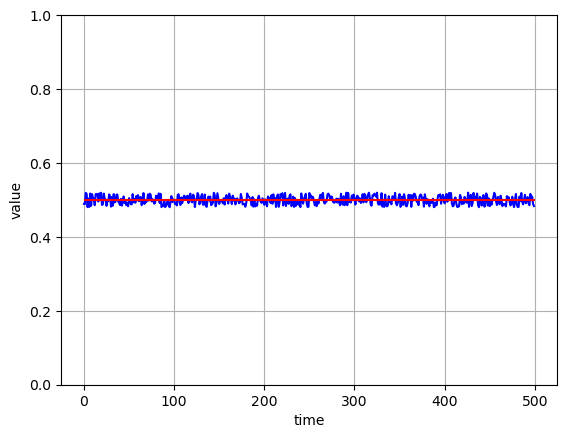

In [2]:
rand_max = 0.52
rand_min = 0.48
size = 500

# create class object
gen_obj = DataGen(rand_max, rand_min, size)

# generate synthetic data
gen_obj.random_gen()
original_values = np.array(gen_obj.values)
gen_obj.plot_values()

## Generate Frequency, Amplitude, and Phase Data

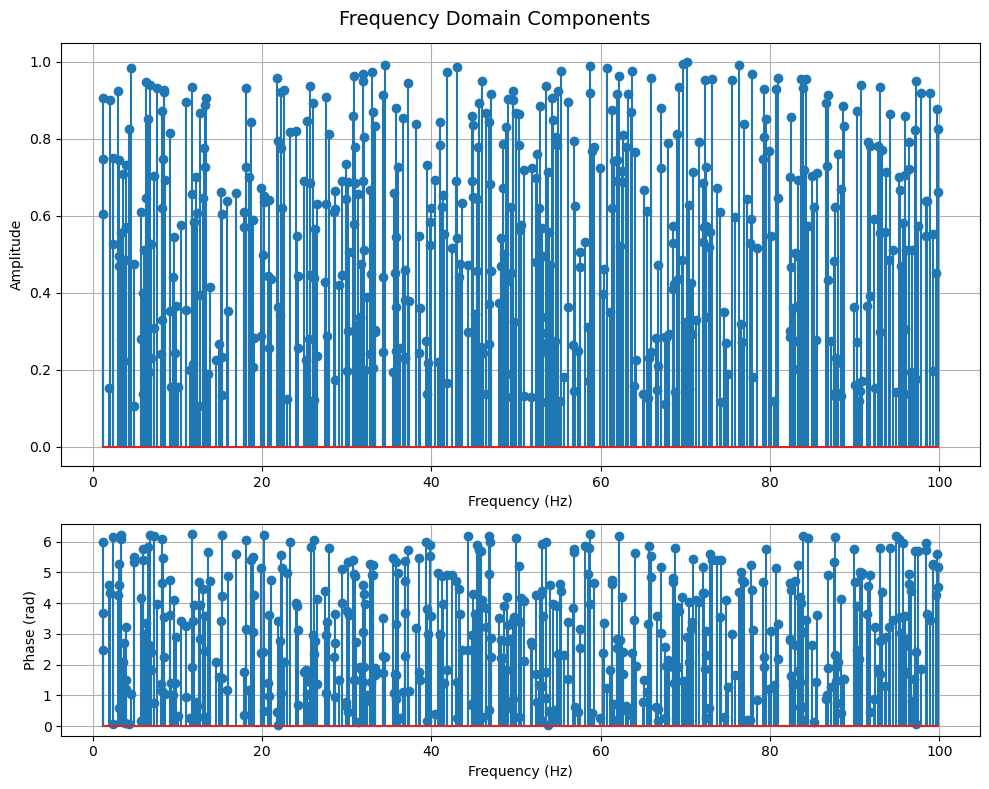

In [3]:
rand_max = None
rand_min = None
size = 500

gen_obj = DataGen(rand_max, rand_min, size)
freq_dict = gen_obj.frequency_gen(amp_params = None,
                                  freq_params = None,
                                  phase_params = None)
gen_obj.plot_frequencies(params = freq_dict, title = "Frequency Domain Components", show_phases = True)

## Generate a signal

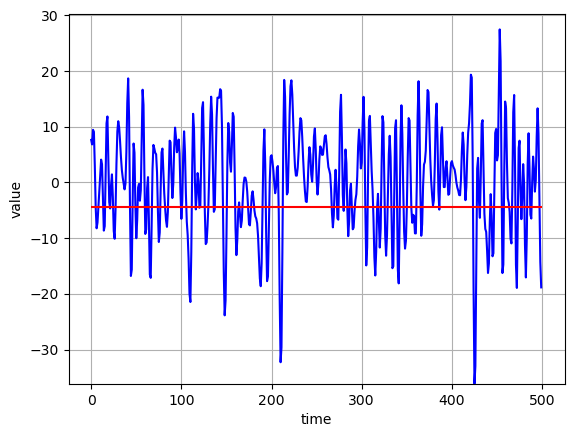

In [4]:
gen_obj.signal_gen(params=freq_dict)
gen_obj.plot_signal()